In [145]:
import sys

if hasattr(sys, 'base_prefix'):
    print(f"base: {sys.base_prefix}")

if hasattr(sys, 'real_prefix'):
    print(f"real: {sys.real_prefix}")

if hasattr(sys, 'prefix'):
    print(f"prfx: {sys.prefix}")

base: /opt/homebrew/Caskroom/miniconda/base/envs/xcda
prfx: /opt/homebrew/Caskroom/miniconda/base/envs/xcda


# 단톡방 대화량 선착순 카운터

카톡 단톡방의 대화량과 선착순을 쏘고 받은 횟수를 세어줍니다.

## 월별(+합계), 인원별(+전체) 판다스 데이터프레임

In [146]:
import pandas as pd
from tqdm import tqdm

In [147]:
chats = {} # 대화량 dict
gifts = {} # 쏜 선착순 dict
badas = {} # 받은 선착순 dict

months = []

with open('KakaoTalkChats.txt', 'r') as f:
    for line in tqdm(f.readlines()):
        line = line.strip()

        if line[:2] == '20' and '년' in line and '월' in line and '일' in line and ('오전' in line or '오후' in line) and line.count(':') == 2:

            index_comma = line.index(',')
            index_colon = line.index(':', index_comma)
            name = line[index_comma+2:index_colon-1]

            YYYY = line[:4]
            index_blank = line.index(' ')
            index_month = line.index('월')
            MM = line[index_blank+1:index_month]
            if len(MM) == 1:
                MM = '0' + MM
            YYYY_MM = YYYY + '-' + MM
            if YYYY_MM not in months:
                months.append(YYYY_MM)

            # chats
            if name not in chats:
                chats[name] = {YYYY_MM: 1}
            elif YYYY_MM not in chats[name]:
                chats[name][YYYY_MM] = 1
            else:
                chats[name][YYYY_MM] += 1

            # gifts
            if line[index_colon+2:index_colon+35]=="선착순 선물 게임을 시작합니다! 기회는 단 10분간, 선착순":
                if name not in gifts:
                    gifts[name] = {YYYY_MM: 1}
                elif YYYY_MM not in gifts[name]:
                    gifts[name][YYYY_MM] = 1
                else:
                    gifts[name][YYYY_MM] += 1

            # badas
            if line[index_colon+2:index_colon+24]=="축하합니다. 선착순 선물에 당첨되었어요!":
                if name not in badas:
                    badas[name] = {YYYY_MM: 1}
                elif YYYY_MM not in badas[name]:
                    badas[name][YYYY_MM] = 1
                else:
                    badas[name][YYYY_MM] += 1

100%|██████████| 2808000/2808000 [00:05<00:00, 547202.24it/s]


In [148]:
# dl: dict-containing-list 구조

dl_chats = {'월별': [*months]}
for participant in chats.keys():
    dl_chats[participant] = []
    for month in months:
        if month not in chats[participant]:
            dl_chats[participant].append(0)
        else:
            dl_chats[participant].append(chats[participant][month])

dl_gifts = {'월별': [*months]}
for participant in gifts.keys():
    dl_gifts[participant] = []
    for month in months:
        if month not in gifts[participant]:
            dl_gifts[participant].append(0)
        else:
            dl_gifts[participant].append(gifts[participant][month])

dl_badas = {'월별': [*months]}
for participant in badas.keys():
    dl_badas[participant] = []
    for month in months:
        if month not in badas[participant]:
            dl_badas[participant].append(0)
        else:
            dl_badas[participant].append(badas[participant][month])

In [149]:
# df, 전체 series, 합계 row, sort

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None


df_chats = pd.DataFrame(dl_chats, columns=dl_chats.keys())
df_chats = df_chats.set_index('월별')

sr_chats = df_chats.sum(axis=1)
sr_chats.name = '전체'
df_chats = pd.concat([sr_chats, df_chats], axis=1)

ro_chats = df_chats.sum(axis=0)
ro_chats.name = '합계'
df_chats = df_chats.append(ro_chats.transpose())

df_chats = df_chats.sort_values(by='합계', axis=1, ascending=False)


df_gifts = pd.DataFrame(dl_gifts, columns=dl_gifts.keys())
df_gifts = df_gifts.set_index('월별')

sr_gifts = df_gifts.sum(axis=1)
sr_gifts.name = '전체'
df_gifts = pd.concat([sr_gifts, df_gifts], axis=1)

ro_gifts = df_gifts.sum(axis=0)
ro_gifts.name = '합계'
df_gifts = df_gifts.append(ro_gifts.transpose())

df_gifts = df_gifts.sort_values(by='합계', axis=1, ascending=False)


df_badas = pd.DataFrame(dl_badas, columns=dl_badas.keys())
df_badas = df_badas.set_index('월별')

sr_badas = df_badas.sum(axis=1)
sr_badas.name = '전체'
df_badas = pd.concat([sr_badas, df_badas], axis=1)

ro_badas = df_badas.sum(axis=0)
ro_badas.name = '합계'
df_badas = df_badas.append(ro_badas.transpose())

df_badas = df_badas.sort_values(by='합계', axis=1, ascending=False)

단톡방 멤버 개인정보 보호 (아래 셀 주석 해제)

In [150]:
# import hashlib

# gm_chats = ['전체']
# for i in range(1, len(df_chats.keys())):
#     gm_chats.append(hashlib.sha256(df_chats.keys()[i].encode()).hexdigest()[:4])
# df_chats = df_chats.set_axis(gm_chats, axis=1, inplace=False)

# gm_gifts = ['전체']
# for i in range(1, len(df_gifts.keys())):
#     gm_gifts.append(hashlib.sha256(df_gifts.keys()[i].encode()).hexdigest()[:4])
# df_gifts = df_gifts.set_axis(gm_gifts, axis=1, inplace=False)

# gm_badas = ['전체']
# for i in range(1, len(df_badas.keys())):
#     gm_badas.append(hashlib.sha256(df_badas.keys()[i].encode()).hexdigest()[:4])
# df_badas = df_badas.set_axis(gm_badas, axis=1, inplace=False)

In [151]:
# 월별 대화량
df_chats

,전체,d1b7,9776,9640,28b6,557f,de7f,bf18,fa76,c2be,1c2e,3df0,28b7,3bb1,bb0f,9e6e,e682,20ab,7f3c,dc12,ad85,81cd,6eba,9c9c,bb6e,fd24,393f,0c55,9062,8a95,cea5,240c,8879,f7c2,ebbf,c97d,a467,671a,e3e1,5c7d,865b,9dbd,dfaf,af15,b941,6c5f,64cb,f26a,b554,fea1,9454,9e8b,7a1d,0759,3dda,ec87,240b,47be,762b,2c5c,7dd4,9ea7,63c8,08e8,d750,8e35,b886,e5ff,594c,7f27,0ee1,4dac,0947,d9c6,8884,15a6,ca29,f0d1,1951,c370,0baa,4da3,9a70,4af9,c322,25cb,d1f7,eff6,3fcc,9a66,9e68,bea9,de39,72c8,a8ec,b692,e5bd,f341,8ba5,9abc,1c4d,fb4f,bfcc,0194,ace3,cacb,edd6,519e,dcd0,5d6b,26ee,4026,db62,fe5d,4c7d,a433,89be,fe5b,ff6d,6a99,1794,e947,0eba,31f4,0300,a272,6234,5a3c,8b37,6799,d540,d52b,5737,e7e9,2e6c,9fda,1aa2,be8f,b0c8,bf13,794d,d319,e62c,3078,b65f,d7d0,4445,82e7,63cb,50b9,0358,6659,dc42,a29b,a884,fb55,1501,c1da,b42c,a169,9c31,4d5a,f355,c622,d10d,146b,67c1,a4b4,a725,2884,702a,7516,fcc8,43ba,2332,3466,2de4,877e,2c79,e807,4cf2,618c,4027,de99,72d2,da29,ab31,d66e,3e48,29ff,d02e,1a1c,4a0a,df23,a3df,dda5,64a3,01e5,3127,526d,fcd1,7da5,755c,f660,02d7,eaea,14a4,9b1d,5ac0,ffb5,65dd,ae69,751b,e157,ee46,f244,b774,1340,d03c,13e1,76ae,7a03,0141,362e,0f2b,8749,fb0d,df56,134e,4ead,5af0,520d,26b0,e410,1adb,c0c2,7227,306c,16d6,e137,c527,c5f6,548f,b079,22a1,f913,7180,7de8,7398,e99d,6490,c1bd
월별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12,32326,2272,0,1570,7513,549,195,418,2170,142,82,611,151,432,339,188,783,343,128,118,231,426,62,5,0,200,150,45,260,255,25,19,473,371,94,462,265,46,0,85,0,29,595,429,85,97,101,1128,5,695,51,0,1534,42,194,141,25,528,186,80,88,0,34,105,0,194,0,5,27,55,7,134,80,0,9,12,14,485,13,0,168,0,0,28,19,144,202,1,264,193,63,5,23,19,58,143,93,22,75,32,61,0,217,0,8,19,0,8,154,0,185,4,212,11,0,2,94,25,36,14,33,0,0,1,10,4,0,0,48,195,38,0,0,13,0,47,0,0,8,0,0,28,9,48,16,0,1,51,7,16,26,4,7,0,20,8,45,6,17,0,0,34,0,0,0,31,31,0,1,0,5,2,0,0,14,3,0,11,1,0,17,0,0,40,0,11,0,23,4,15,0,0,0,0,6,2,1,0,0,11,1,9,2,0,11,0,5,1,1,0,6,0,0,0,1,0,2,0,0,0,0,6,6,0,0,0,5,1,0,3,0,3,2,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0
2021-01,56262,4654,2186,4833,9965,555,874,1101,3728,155,231,559,620,942,752,415,1348,1001,645,190,322,1291,77,3,0,1269,1196,506,617,463,5,20,691,781,197,637,615,21,55,71,0,85,1074,530,46,255,101,870,4,511,64,0,2525,244,232,178,34,395,260,60,133,0,55,8,1,146,0,3,45,53,17,221,129,0,21,2,5,212,136,0,214,0,0,50,7,150,209,8,583,102,17,3,44,78,41,121,175,99,78,6,306,0,132,0,1,24,0,24,168,0,58,2,123,5,0,1,105,55,31,47,42,0,0,0,3,20,0,0,7,0,47,2,0,7,1,115,0,0,54,0,0,17,4,35,32,0,0,64,5,4,16,2,50,0,4,8,26,18,28,0,0,8,0,67,0,33,35,3,0,0,13,3,0,0,28,0,0,38,4,0,20,8,1,4,0,8,0,6,10,4,0,0,0,0,6,2,0,1,0,2,1,2,0,0,0,0,4,3,7,0,2,0,2,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,2,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2021-02,78084,12943,338,6811,8354,509,3142,2438,4246,1528,283,489,793,2602,1011,804,2191,1859,1149,235,545,1640,107,27,0,1233,1419,2366,924,1565,1,19,645,471,325,478,3766,17,677,171,0,6,1017,1498,26,35,52,274,11,552,101,0,521,4,531,501,78,520,182,19,89,0,222,30,5,54,0,6,194,66,11,349,247,0,2,0,6,328,4,0,81,1,0,20,3,10,197,302,0,106,14,0,63,9,113,192,110,72,25,12,38,0,73,0,0,35,0,4,95,0,16,0,22,41,7,0,7,16,26,14,29,0,0,1,46,38,0,0,127,0,74,6,0,1,3,0,0,0,8,0,0,0,2,19,5,0,2,4,85,10,27,2,4,0,14,56,9,1,16,0,2,35,0,4,0,3,0,0,0,0,9,0,0,0,0,2,3,2,1,0,1,0,0,0,0,7,0,1,12,0,0,0,0,0,8,0,0,0,0,2,1,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2021-03,92173,10142,2076,11012,5807,549,6170,4615,7606,3565,1958,853,1066,2990,2605,1073,1990,3962,1531,121,1376,1750,187,2036,0,501,750,788,1089,308,0,37,424,841,287,559,1725,292,691,181,0,91,641,1494,138,89,21,97,11,586,150,0,0,3,231,1324,89,187,259,63,42,0,225,172,23,84,0,5,168,37,70,486,26,0,5,4,21,201,17,0,123,2,0,0,0,3,25,99,0,139,20,6,42,13,115,25,76,43,21,32,5,0,73,0,1,58,0,21,28,0,0,4,

In [152]:
# 월별 선착순 쏜 횟수
df_gifts

,전체,de7f,bf18,ebbf,9640,3bb1,ad85,9c9c,7f3c,9454,5c7d,c2be,9e6e,28b7,cea5,dc12,2c5c,fd24,6eba,557f,240c,9776,d750,8a95,9062,3df0,c97d,d1b7,e3e1,28b6,7f27,20ab,e682,1c2e,64cb,b554,393f,25cb,f7c2,81cd,9e8b,8879,72c8,9dbd,bb0f,b886,af15,08e8,865b,dfaf,0c55,240b,fa76,0ee1,6c5f,1a1c,ace3,9ea7,3dda,0759,9a70,9e68,594c,31f4,ca29,7dd4,4da3,de39,794d,e5bd,6234,15a6,5a3c,fcc8,8884,5d6b,5737,a467,ec87,e62c,f355,a433,d7d0,edd6,671a,1aa2,f26a,618c,72d2,df23,4445,ab31,a29b,a169,f660,be8f,76ae,0eba,1340,9fda,13e1,9abc,43ba,0f2b,0194,e807,519e,d10d,c0c2,146b,e5ff,6659,26ee,1794,b65f,0947,4dac,bf13,fe5d,b0c8,ae69,d540,47be,1951,fea1,29ff,9b1d,d9c6,e947,fb4f,ffb5,eaea,2884
월별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12,8,0,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01,9,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2021-02,11,0,2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-03,55,3,2,7,3,0,1,3,3,2,0,2,1,2,0,0,1,0,0,0,0,1,1,0,1,0,3,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,0,0,0,0,1,0,2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2021-04,193,13,11,12,9,2,11,19,14,4,4,1,6,4,0,1,1,4,0,0,0,3,7,0,3,1,5,4,2,5,1,3,1,2,0,3,1,0,0,2,0,2,5,2,2,0,3,3,0,2,0,1,0,1,2,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2021-05,377,17,24,25,12,22,25,34,20,10,5,7,11,13,0,10,3,2,10,6,4,18,3,7,6,0,4,5,1,3,1,8,5,1,0,12,0,0,10,6,0,3,1,2,1,0,3,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2021-06,343,15,22,29,9,14,17,26,18,6,5,5,10,11,0,10,9,0,13,2,9,13,3,2,6,7,6,7,0,1,0,3,4,6,1,4,2,2,4,5,0,1,5,3,2,0,1,0,0,4,3,0,1,1,1,0,2,0,0,0,0,0,0,1,1,0,0,0,4,3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-07,256,21,12,32,3,9,15,14,16,20,8,4,7,5,2,6,4,2,1,9,3,4,5,1,2,2,8,0,1,1,1,1,6,5,0,2,0,2,0,1,3,3,4,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-08,191,12,18,20,10,7,13,7,10,9,6,6,5,5,3,1,1,1,3,5,3,1,1,7,5,0,1,1,3,2,1,2,2,1,0,2,0,5,1,0,1,1,2,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
# 월별 선착순 받은 횟수
df_badas

,전체,28b7,7f3c,5c7d,cea5,9e6e,240c,9776,b554,81cd,d1b7,dc12,9062,de7f,bf18,c2be,0ee1,9c9c,c97d,8a95,d750,9640,1c2e,4da3,557f,ad85,e3e1,15a6,28b6,9454,e682,0c55,20ab,bb0f,2c5c,fd24,3bb1,3df0,4026,bea9,393f,9dbd,a467,fa76,6eba,08e8,a433,865b,6c5f,64cb,31f4,8e35,594c,7f27,f7c2,9abc,ebbf,ca29,762b,7dd4,0eba,6234,8879,2e6c,9e8b,cacb,9e68,e7e9,fb4f,5737,0759,f26a,1951,edd6,fe5d,e947,8884,d319,b941,6659,25cb,240b,0947,1794,ace3,d9c6,de39,1c4d,c1da,fea1,e5bd,0300,7516,d1f7,1aa2,af15,2884,a169,e807,ff6d,dc42,4445,26ee,702a,0baa,0194,ec87,a272,4027,bf13,9ea7,a29b,a4b4,9a66,fe5b,a725,df23,47be,72c8,4af9,6a99,43ba,f355,e5ff,72d2,d10d,5d6b,4dac,f341,d02e,b0c8,8ba5,5a3c,ab31,64a3,dfaf,9a70,50b9,618c,dda5,d540,fcd1,3dda,3466,e62c,f660,0358,fcc8,755c,b886,671a,be8f,da29,db62,eff6,eaea,d52b,89be,8749,d7d0,9c31,e157,2332,3e48,3127,9b1d,ae69,b65f,a884,a8ec,751b,13e1,01e5,548f,3fcc,519e,877e,3078,02d7,82e7,4ead,ee46,67c1,b692,2c79,8b37,fb55,7227,5af0,520d,f0d1,794d,7da5,1501
월별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12,25,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2021-01,26,0,2,0,0,0,1,0,0,1,3,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1,0,0,0,2,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-02,63,6,1,0,0,4,1,0,0,3,3,0,0,3,1,0,1,0,1,0,1,5,1,1,0,1,1,0,0,0,0,0,0,2,1,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
2021-03,342,17,7,7,0,17,9,8,0,20,6,0,11,17,15,18,11,20,18,0,7,11,10,1,1,5,10,0,7,2,4,1,3,6,5,1,0,1,3,0,0,3,8,0,0,2,2,0,2,0,4,2,2,0,1,0,2,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,3,0,1,0,0,2,0,1,0,1,1,0,1,1,1,1,1,0,0,1,0,2,0,0,0,0,1,1,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2021-04,1589,73,86,57,0,72,42,45,76,81,57,12,52,52,65,34,36,64,57,1,38,45,23,9,2,30,17,1,18,13,9,13,31,27,10,14,10,8,14,0,6,17,23,21,0,14,11,0,11,1,4,14,12,3,5,3,1,13,3,2,0,0,0,3,0,2,2,7,0,0,0,3,0,0,5,0,4,1,0,8,1,1,0,3,1,0,10,1,4,2,2,0,1,2,0,4,0,0,0,2,1,0,0,0,0,0,16,0,2,7,0,0,0,0,1,4,0,0,3,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,4,0,6,1,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2021-05,2526,191,129,90,0,93,79,168,156,115,49,66,59,108,71,67,35,107,81,9,32,46,28,19,15,46,16,0,17,33,31,44,47,44,25,8,38,2,8,0,8,38,43,13,23,9,19,0,12,1,4,5,11,0,11,1,2,0,11,3,0,0,4,4,0,3,2,9,0,2,0,5,1,0,7,0,5,4,0,7,1,2,0,4,6,0,8,0,2,0,4,0,2,6,0,14,0,0,0,3,1,0,0,0,1,0,1,0,2,4,0,0,0,1,1,5,0,0,1,0,0,0,0,0,0,0,0,4,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,2,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-06,2482,177,119,87,34,87,147,111,142,107,81,81,52,103,58,58,45,104,55,4,33,33,55,27,23,60,18,0,18,17,30,51,41,48,41,11,22,11,12,0,10,12,18,20,18,19,10,0,16,3,14,1,1,1,16,2,4,2,1,3,0,0,2,11,0,3,1,7,0,2,1,5,2,0,1,0,6,3,0,9,5,1,0,1,1,0,1,1,5,2,3,0,0,2,0,0,0,0,0,1,0,0,1,2,0,0,0,0,2,0,0,0,0,0,2,0,0,7,2,1,1,0,0,0,0,0,0,0,2,0,0,1,0,0,1,3,0,0,0

## 월별(+합계), 인원별(+전체) 엑셀 스프레드시트

In [154]:
with pd.ExcelWriter('대화량 선착순 카운터.xlsx') as w:
    df_chats.to_excel(w, sheet_name='대화량')
    df_gifts.to_excel(w, sheet_name='선착순 쏜 횟수')
    df_badas.to_excel(w, sheet_name='선착순 받은 횟수')

## 월별 그래프

In [155]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from cycler import cycler

설치된 폰트 리스트 확인 (아래 셀 주석 해제)

In [156]:
# import matplotlib.font_manager as fm
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [157]:
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
plt.rcParams['font.size'] = 14

plt.rcParams['figure.dpi'] = 200

palette = [
    (48, 103, 155),
    (150, 159, 83)
]
white = (255, 255, 255)
gray = (52, 52, 52)

palette = np.array(palette)/255
white = np.array(white)/255
gray = np.array(gray)/255

# background
mpl.rcParams['figure.facecolor'] = white
mpl.rcParams['figure.edgecolor'] = white
mpl.rcParams['axes.facecolor'] = white

# text
mpl.rcParams['text.color'] = gray
mpl.rcParams['axes.labelcolor'] = gray
mpl.rcParams['axes.edgecolor'] = gray
mpl.rcParams['xtick.color'] = gray
mpl.rcParams['ytick.color'] = gray

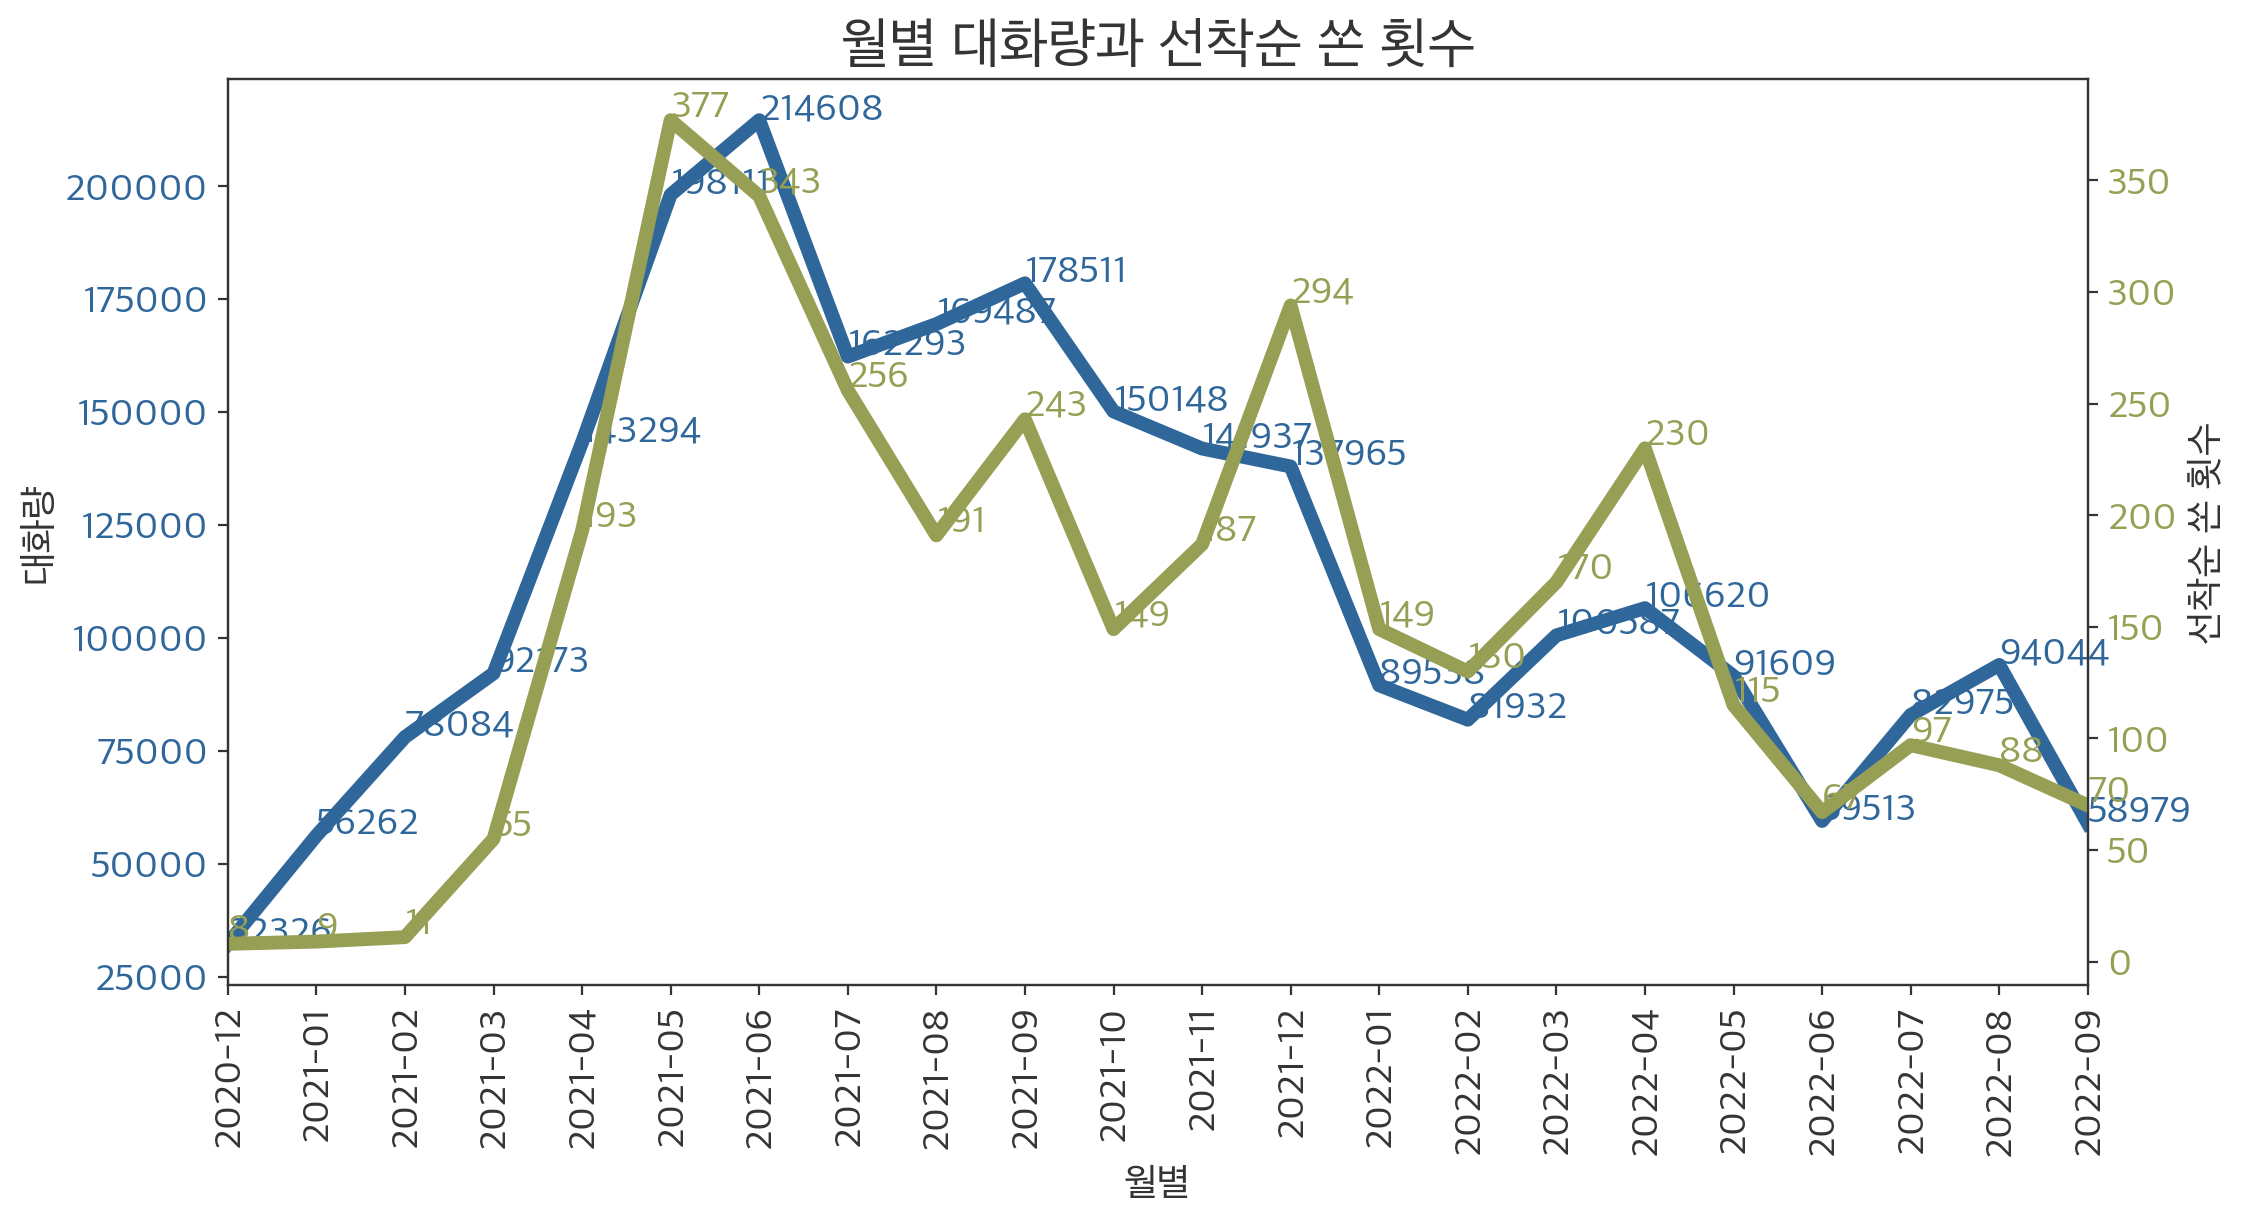

In [164]:
x_chats = list(df_chats['전체'].index.values)[:-1]
y_chats = list(df_chats['전체'].values)[:-1]

x_gifts = list(df_gifts['전체'].index.values)[:-1]
y_gifts = list(df_gifts['전체'].values)[:-1]

x_badas = list(df_badas['전체'].index.values)[:-1]
y_badas = list(df_badas['전체'].values)[:-1]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.set_title('월별 대화량과 선착순 쏜 횟수', fontsize=20)

ax.plot(x_chats, y_chats, color=palette[0], linewidth=5.0)
ax.tick_params(axis='y', labelcolor=palette[0])
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('월별')
ax.set_ylabel('대화량')
for i, j in zip(x_chats, y_chats):
    ax.annotate(j, xy=(i,j+1), color=palette[0])

ax2 = ax.twinx()
ax2.plot(x_gifts, y_gifts, color=palette[1], linewidth=5.0)
ax2.tick_params(axis='y', labelcolor=palette[1])
ax2.set_ylabel('선착순 쏜 횟수')
for i, j in zip(x_gifts, y_gifts):
    ax2.annotate(j, xy=(i,j+1), color=palette[1])

ax.margins(x=0)
plt.show()

## 월별(/합계) 선택 후 인원별 텍스트 출력

In [159]:
import ipywidgets as widgets
from IPython.display import display

In [160]:
w = widgets.Select(
    options=list(df_chats.index.values),
    value='2022-09',
    description='선택:',
    disabled=False
)
display(w)
print(w.value)

Select(description='선택:', index=21, options=('2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',…

2022-09


In [161]:
print('총 대화량:', df_chats.loc[w.value].values[0])
print('대화에 참여한 사람 수:', len([i for i in (df_chats.loc[w.value].values).tolist() if i>0])-1, '\n')

for i in range(1, len(df_chats.loc[w.value])):
    pi_chats = df_chats.sort_values(by=df_chats.loc[w.value].name, axis=1, ascending=False)
    if int(pi_chats.loc[w.value].values[i])>0:
        print(pi_chats.loc[w.value].index[i] + ': ' + str(pi_chats.loc[w.value].values[i]))

총 대화량: 58979
대화에 참여한 사람 수: 127 

28b6: 6158
9640: 4215
3df0: 4049
fa76: 3674
6eba: 2904
557f: 2596
bb0f: 2360
393f: 2024
9776: 1865
d1b7: 1863
bb6e: 1829
bf18: 1824
de7f: 1767
1c2e: 1622
fd24: 1506
e682: 1311
cea5: 1269
3bb1: 1126
9062: 1085
0c55: 939
c2be: 927
20ab: 682
9e6e: 674
240c: 641
28b7: 641
8879: 638
dc12: 618
ad85: 576
81cd: 541
8a95: 527
e3e1: 440
5c7d: 418
7f3c: 378
b941: 368
f7c2: 337
5d6b: 318
6c5f: 312
d9c6: 251
9dbd: 247
ebbf: 245
e5ff: 243
9c9c: 222
9ea7: 168
9e8b: 160
865b: 157
64cb: 142
63c8: 135
a467: 101
0194: 99
c97d: 95
c322: 86
edd6: 79
0ee1: 76
594c: 72
0759: 72
0947: 62
2c5c: 61
9454: 54
8e35: 53
7f27: 51
ca29: 51
bea9: 50
c370: 48
fea1: 47
4da3: 45
d7d0: 43
9a70: 40
762b: 39
8884: 38
0baa: 36
15a6: 35
e947: 35
240b: 31
6234: 25
5a3c: 24
f26a: 24
fb4f: 23
3dda: 23
4af9: 22
0eba: 20
b554: 20
a29b: 19
de39: 19
1aa2: 18
af15: 17
cacb: 17
08e8: 16
31f4: 14
fe5b: 12
43ba: 11
519e: 9
4026: 9
e807: 9
1794: 8
47be: 7
d52b: 6
ace3: 6
5737: 6
f355: 6
a4b4: 6
72d2: 6
03

In [162]:
print('선착순 쏜 횟수:', df_gifts.loc[w.value].values[0])
print('선착순 쏜 사람 수:', len([i for i in (df_gifts.loc[w.value].values).tolist() if i>0])-1, '\n')

for i in range(1, len(df_gifts.loc[w.value])):
    pi_gifts = df_gifts.sort_values(by=df_gifts.loc[w.value].name, axis=1, ascending=False)
    if int(pi_gifts.loc[w.value].values[i])>0:
        print(pi_gifts.loc[w.value].index[i] + ': ' + str(pi_gifts.loc[w.value].values[i]))

선착순 쏜 횟수: 70
선착순 쏜 사람 수: 28 

de7f: 12
3bb1: 7
bf18: 6
5c7d: 5
ebbf: 4
9640: 4
1c2e: 3
cea5: 3
fd24: 3
5d6b: 2
28b6: 2
e3e1: 2
2c5c: 2
8879: 1
64cb: 1
20ab: 1
9062: 1
9a70: 1
3df0: 1
7f27: 1
240c: 1
9776: 1
9ea7: 1
dc12: 1
28b7: 1
7f3c: 1
ad85: 1
557f: 1


In [163]:
print('선착순 받은 횟수:', df_badas.loc[w.value].values[0])
print('선착순 받은 사람 수:', len([i for i in (df_badas.loc[w.value].values).tolist() if i>0])-1, '\n')

for i in range(1, len(df_badas.loc[w.value])):
    pi_badas = df_badas.sort_values(by=df_badas.loc[w.value].name, axis=1, ascending=False)
    if int(pi_badas.loc[w.value].values[i])>0:
        print(pi_badas.loc[w.value].index[i] + ': ' + str(pi_badas.loc[w.value].values[i]))

선착순 받은 횟수: 932
선착순 받은 사람 수: 106 

cea5: 41
5c7d: 38
9062: 32
28b7: 32
9e6e: 30
0ee1: 26
bf18: 26
4da3: 23
8a95: 23
c2be: 22
81cd: 22
7f3c: 22
d1b7: 20
dc12: 19
e947: 19
3df0: 18
240c: 18
bea9: 17
15a6: 16
ad85: 16
c97d: 16
0947: 16
1c2e: 15
9640: 13
de7f: 13
6234: 13
9dbd: 12
0eba: 12
0c55: 12
fa76: 11
5d6b: 11
fd24: 11
3bb1: 11
9454: 11
b554: 10
e3e1: 10
865b: 10
393f: 10
28b6: 9
6eba: 8
e682: 8
bb0f: 8
557f: 8
2c5c: 7
9776: 7
31f4: 7
cacb: 6
e807: 5
9e8b: 5
08e8: 5
8e35: 5
1aa2: 5
df23: 5
762b: 5
fb4f: 5
4026: 5
d9c6: 4
43ba: 4
edd6: 4
0759: 4
4af9: 4
0194: 4
a169: 4
7f27: 4
8879: 4
20ab: 4
ca29: 4
6c5f: 4
2e6c: 3
d750: 3
a4b4: 3
a29b: 3
4445: 3
64cb: 3
594c: 3
0300: 3
d02e: 3
ebbf: 3
fe5d: 3
5737: 3
b941: 2
9abc: 2
fcc8: 2
240b: 2
9ea7: 2
1794: 2
d319: 2
9e68: 2
72d2: 2
2884: 2
f355: 2
a467: 2
f26a: 1
e5ff: 1
e7e9: 1
702a: 1
9c9c: 1
5a3c: 1
ab31: 1
f660: 1
bf13: 1
9a70: 1
1c4d: 1
f7c2: 1
8884: 1
dc42: 1
